In [1]:
# importing modules and NAN deleting
import pandas as pd
import warnings
warnings.simplefilter('ignore')
%pylab inline
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
df = pd.read_csv("movie_metadata.csv")
df = df.dropna()

#df.info()
#df.head()
#df.describe()

Populating the interactive namespace from numpy and matplotlib


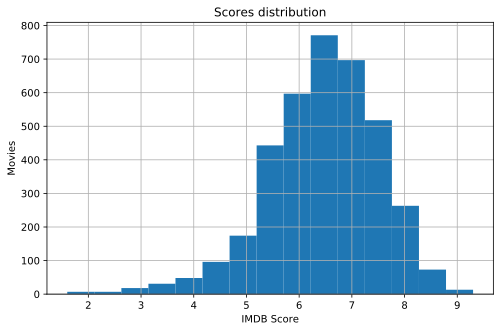

In [2]:
scores = df.imdb_score.hist(bins=15)
scores.set_title('Scores distribution')
scores.set_xlabel('IMDB Score')
scores.set_ylabel('Movies')

В визуализации участвует переменная imdb_score ("оценка фильма") вещественного типа. Цель визуализации - оценить тип распределения оценок в выборке фильмов. Была выбрана гистограмма, которая является распространенным типом графика для анализа распределения величин. На графике видно, что распределение является нормальным. 

In [3]:
top_data = df.loc[:, ['movie_title', 'imdb_score']]
top_data = top_data.sort_values('imdb_score', ascending=False).head(10)
top_data.style.bar()

,movie_title,imdb_score
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
66,The Dark Knight,9
2837,The Godfather: Part II,9
339,The Lord of the Rings: The Return of the King,8.9
4498,"The Good, the Bad and the Ugly",8.9
1874,Schindler's List,8.9
3355,Pulp Fiction,8.9
836,Forrest Gump,8.8
270,The Lord of the Rings: The Fellowship of the Ring,8.8


Здесь было просто интересно посмотреть на топ-10 фильмов по оценкам (imdb_score)

In [4]:
import seaborn as sns
%config InlineBackend.figure_format = 'png'

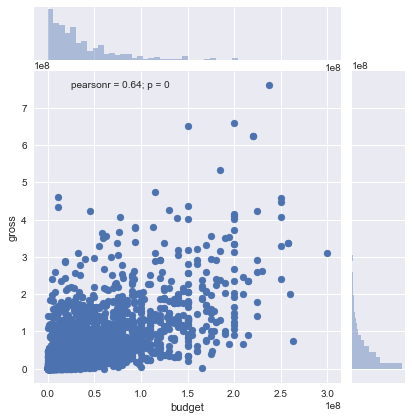

In [5]:
sns.jointplot(y='gross', x='budget', data=df[df.country == 'USA'], kind='scatter')

В визуализации используются переменные вещественного типа budget (бюджет фильма) и gross (кассовые сборы). Цель - определить степень влияния бюджета фильма на последующие кассовые сборы. Scatter plot (диаграмма рассеивания) в сочетании с гистограммой является классическим способом визуального анализа корреляции двух переменных. При этом, автор набора данных пишет, что денежные единицы использовались национальные, а не единая. Поэтому для графика были отобраны только фильмы, произведенные в США. Коэффициент корреляции значимо положительный, что говорит о статистической взаимосвязи переменных. 

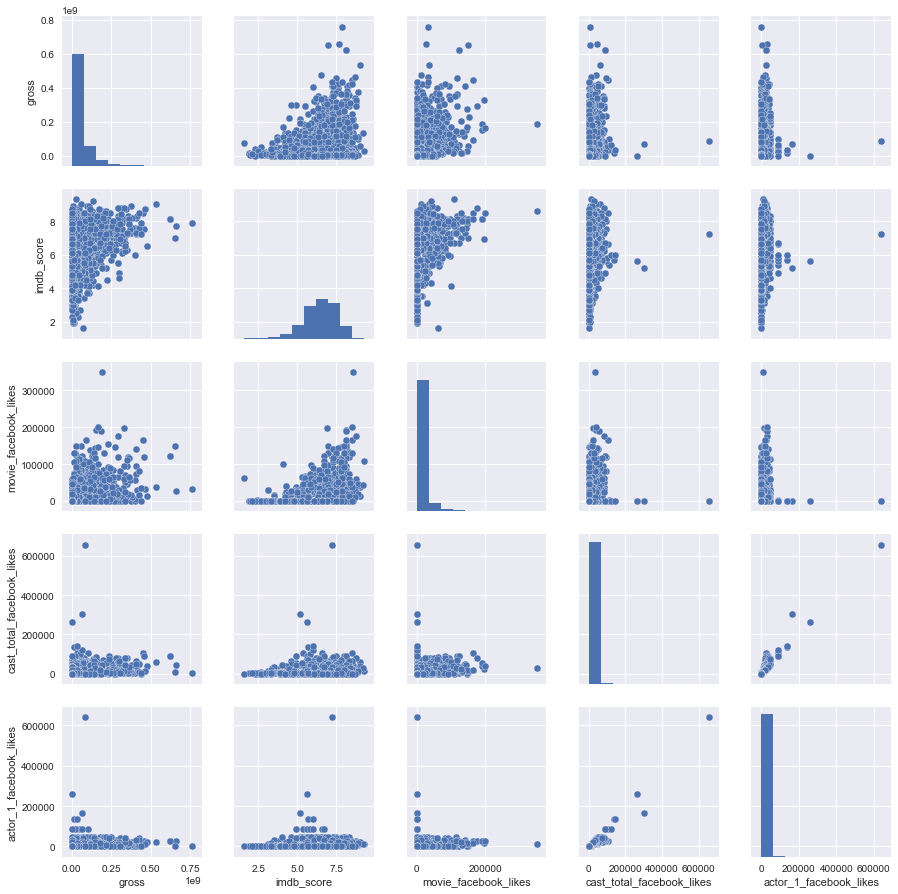

In [6]:
sns.plot = sns.pairplot( df[['gross', 'imdb_score', 'movie_facebook_likes', 'cast_total_facebook_likes', 
                             'actor_1_facebook_likes']] )

В визуализации использовались переменные вещественного типа: gross, imdb_score, movie_facebook_likes, cast_total_facebook_likes, actor_1_facebook_likes. Цель - оперативно выявить наличие взаимных корреляций между набором переменных, что лучше всего решается с помощью pairplot. Интересно было проверить, во-первых, взаимосвязь между gross (кассовые сборы фильма) и imdb_score (рейтингом фильма), и во-вторых, - между лайками на FB и рейтингом фильма. В обоих случаях наблюдается слабая положительная корреляция: 1) между сборами и рейтингом, 2) между количеством лайков фильма и его рейтингом. Влияние количества лайков первого актера фильма на общее количество лайков практически линейное, что говорит о том, что лайки первого актера составляют основную часть лайков фильма.


In [7]:
import ggplot

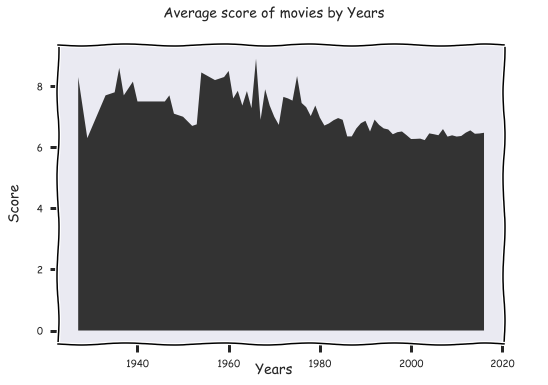

<ggplot: (-9223363289097319599)>


In [8]:
p = ggplot.ggplot(ggplot.aes(x='title_year', y = 'imdb_score'), 
           data = df.groupby(['title_year'], as_index = False)[['imdb_score']].mean())\
    + ggplot.geom_area()\
    + ggplot.ggtitle("Average score of movies by Years")\
    + ggplot.xlab("Years")\
    + ggplot.ylab("Score")\
    + ggplot.theme_xkcd()
    
print(p);

В визуализации использовалась переменная вещественного типа imdb_score (рейтинг фильма) в распределении по годам производства кинокартин. Показатель усреднялся за анализируемый год. Цель - определить, имеют ли фильмы, снятые давно более высокий или низкий рейтинг по сравнению с теми, что были снятые в последние 20 лет. Для отображения был выбран график "область в динамике", подходящий для визуализации временных рядов. На графике видно, что в среднем фильмы до 90-х имеют более высокий рейтинг, чем после. В дополнение отмечаются колебания показателя ввиду небольшого количества фильмов, попавших в оценку из этого периода; а также вследствие мЕньшего числа голосовавших и оценивавших старые фильмы по сравнению с относительно недавними. 


In [9]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [10]:
years_df = df.groupby('title_year')[['num_critic_for_reviews']].sum().join(
    df.groupby('title_year')[['num_user_for_reviews']].sum()
)
years_df.columns = ['num_critic_for_reviews', 'num_user_for_reviews']

In [11]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.num_critic_for_reviews,
#    mode='lines',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4),
    name='Critics'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.num_user_for_reviews,
#    mode='markers',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4),
    name='Users'
)

data = [trace0, trace1]
layout = {'title': 'What films were estimated by critics and what by users?'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

В визуализации используются агрегированные по годам вещественные переменные num_critic_for_reviews, num_user_for_reviews. Цель - сравнить степень интереса двух групп (критиков и пользователей) к фильмам разных лет с помощью показателя количества активных рецензентов. Был выбран график линии, т.к. в данных есть хронологическая последовательность. Тем не менее, график линий для данного случай не является лучшим и возможно использование гистограммы. На графике видно, что больше всего пользовательских рецензий приходится на фильмы с 200 по 2007 года. Тогда как у критиков выходит больше рецезий на фильмы последних нескольких лет. 

In [12]:
plotly.offline.plot(fig, filename='Movies_Critics_Users.html', show_link=False);